In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

In [2]:
%config Completer.use_jedi = False

# Сравнение средних

## [2.1 T-распределение](https://stepik.org/lesson/8081/step/1?unit=1360)

### Нормальное распределение и ограниченность количества наблюдений

До этого мы пользовались нормальным распределением не совсем правомерно, так как нам неизвестно стандартное отклонение $\sigma$ его оценка по выборке приближает его неплохо, только в случае больших выборок. В остальных случаях лучше пользоваться распределением Стьюдента.

### Распределение Стьюдента (Т-распределение)

Однопараметрическое семейство распределений (зависит от числа степеней свободы), которое сходится к нормальному при большом количестве степеней свободы. Имеет более высокие хвосты, чем нормальное. 

В видео лекциях я сказал, что мы используем t - распределение в ситуации небольшого объема выборки. Необходимо более подробно пояснить, зачем это нужно.

Вернемся к предельной центральной теореме, мы уже узнали, что если некий признак в генеральной совокупности распределен нормально (не обязательно) со средним μ и стандартным отклонением σ, и мы будем многократно извлекать выборки одинакового размера n, и для каждой выборки рассчитывать, как далеко выборочное среднее $\bar{X}$ отклонилось от среднего в генеральной совокупности в единицах стандартной ошибки среднего:

$$
\large z = \frac{\bar{X} - \mu}{\frac{\sigma}{\sqrt{n}}} 
$$
то эта величина z будет иметь стандартное нормальное распределение со средним равным нулю и стандартным отклонением равным единице.

Обратите внимание, что для расчета стандартной ошибки мы используем именно стандартное отклонение в генеральной совокупности - $\sigma$. Ранее мы уже обсуждали, что на практике $\sigma$ нам практически никогда не известна, и для расчета стандартной ошибки мы используем выборочное стандартное отклонение.

Так вот, строго говоря в таком случае распределение отклонения выборочного среднего и среднего в генеральной совокупности, деленного на стандартную ошибку, теперь будет описываться именно при помощи t - распределения.
$$
\large t = \frac{\bar{X} - \mu}{\frac{sd}{\sqrt{n}}}
$$

Таким образом, в случае неизвестной $\sigma$ мы всегда будем иметь дело с $t$ - распределением. На этом этапе вы должны с негодованием спросить меня, почему же мы применяли $z$ - критерий в первом модуле курса, для проверки гипотез, используя выборочное стандартное отклонение?

Мы уже знаем, что при довольно большом объеме выборки (обычно в учебниках приводится правило, n > 30) t - распределение совсем близко подбирается к нормальному распределению:

![alt text](.\\images\\35.png "Title")

Поэтому иногда, для простоты расчетов говорится, что если n > 30, то мы будем использовать свойства нормального распределения для наших целей. Строго говоря, это конечно неправильный подход, который часто критикуют. В до компьютерную эпоху этому было некоторое объяснение, чтобы не рассчитывать для каждого n больше 30 соответствующее критическое значение t - распределения, статистики как бы округляли результат и использовали нормальное распределение для этих целей. Сегодня, конечно, с этим больше никаких проблем нет, и все статистические программы, разумеется, без труда рассчитают все необходимые показатели для t - распределения с любым числом степеней свободы. Действительно при выборках очень большого объема t - распределение практически не будет отличаться от нормального, однако, хоть и очень малые но различия все равно будут.

Поэтому, правильнее будет сказать, что мы используем t - распределение не потому что у нас маленькие выборки, а потому что мы не знаем стандартное отклонение в генеральной совокупности. Поэтому в дальнейшем мы всегда будем использовать t - распределение для проверки гипотез, если нам неизвестно стандартное отклонение в генеральной совокупности, необходимое для расчета стандартной ошибки, даже если объем выборки больше 30.

### Понятие числа степеней свободы


Проверка статистических гипотез по $t$-критерию

`Задание`
Если на выборке в 15 наблюдений при помощи одновыборочного t-теста проверяется нулевая гипотеза: $\mu=10$ 

и рассчитанное t-значение равняется -2, то p-уровень значимости  (двусторонний) равен:

In [3]:
n = 15 # объем выборки
df = n - 1 # число степеней свободы
t = -2
p = 2*stats.t.cdf(-2, df) # p-value
p

0.06528795288911197

## [2.2 Сравнение двух средних; t-критерий Стьюдента](https://stepik.org/lesson/9249/step/1?unit=1829)

### Сравнение двух средних

t-критерий удобно применять в тех случаях, когда нам нужно поставить статистическую гипотезу о равенстве двух средних

### t-критерий Стьюдента

Для применения данного критерия необходимо, чтобы исходные данные имели нормальное распределение. В случае применения двухвыборочного критерия для независимых выборок также необходимо соблюдение условия равенства дисперсий. Существуют, однако, альтернативы критерию Стьюдента для ситуации с неравными дисперсиями.

Пусть у нас есть две выборки:
1. $\bar{X}_1$, $sd_1$, $n_1$
1. $\bar{X}_2$, $sd_2$, $n_2$

Поставим гипотезу о равенстве средних:
$$H_0: M_1 = M_2$$
при альтернативе о неравенстве
$$H_1: M_1 \ne M_2$$

Рассчитаем значение величины t:
$$
t = \frac{\bar{X}_1 - \bar{X}_2}{\sqrt{\frac{sd_1^2}{n_1} +  \frac{sd_2^2}{n_2}}}
$$

Тогда в случае принятие нулевой гипотезы, мы можем рассчитать значение p-value, исходя из t-распреления со следующим числом степеней свободы:
$$
df= n_1 + n_2 - 2
$$

`Пример`
Процесс денатурации ДНК представляет разрушение водородных связей между двумя цепями этой молекулы и очень сильно зависит от температуры, с которой мы воздействуем на молекулу.

При сравнение двух видов между собой в исследовании были получены следующие различия в средней температуре плавления ДНК

In [4]:
sample_1 = np.array([84.7,   105.0,   98.9,   97.9,   108.7,   81.3,   99.4,   89.4,   93.0,   119.3,
            99.2,   99.4,   97.1,   112.4,   99.8,   94.7,   114.0,   95.1,   115.5,   111.5])

sample_2 = np.array([57.2,   68.6,   104.4,   95.1,   89.9,   70.8,   83.5,   60.1,   75.7,   102.0,
             69.0,   79.6,   68.9,   98.6,   76.0,   74.8,   56.0,   55.6,   69.4,   59.5])

In [5]:
# средние значения
X_1 = sample_1.mean() 
X_2 = sample_2.mean()

# объемы выборок
n_1 = len(sample_1)
n_2 = len(sample_2)

# стандартные отклонения
sd_1 = sample_1.std(ddof=1)
sd_2 = sample_2.std(ddof=1)

sd_1, sd_2

(10.246502612573408, 15.458102116774606)

In [6]:
# t-критерий
t = (X_1 - X_2)/np.sqrt(sd_1*sd_1/n_1 + sd_2*sd_2/n_2)
t

6.04781958789892

In [7]:
# Число степеней свободы
df = n_1 + n_2 - 2
df

38

Зададимся уровнем значимости в 0.05 и рассчитаем p-value

In [8]:
2*stats.t.cdf(-t, df)

4.894702897415829e-07

### Построение графиков

Для сравнение двух выборок удобно построить box-plot и график, показывающий доверительные интервалы для средних

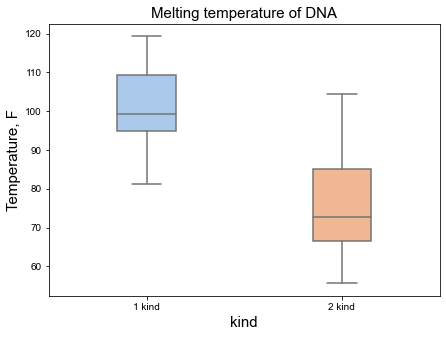

In [9]:
x = np.array(['1 kind']*len(sample_1) + ['2 kind']*len(sample_2))
y = np.concatenate([sample_1, sample_2])
data = pd.DataFrame({'kind': x, 'Melting temperature of DNA': y})

fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(111)
sns.set_style("darkgrid")
sns.set_palette("pastel")
sns.boxplot(x="kind", y="Melting temperature of DNA", data=data, width=0.3)
sns.set(font_scale=1.1)
sns.color_palette("hls", 8)
ax.set_xlabel('kind', fontsize=15)
ax.set_ylabel('Temperature, F', fontsize=15)
ax.set_title('Melting temperature of DNA', fontsize=15)
plt.show()

Построим доверительные интервалы для среднего в двух выборках

Зададимся уровнем значимости в 0.95

In [10]:
alpha = 0.95

# Коэффициент для данного уровня значимости
K = stats.t.ppf((1+alpha)/2, df=n_1-1)

In [11]:
left_bound_1 = X_1 - K*sd_1/np.sqrt(n_1)
right_bound_1 = X_1 + K*sd_1/np.sqrt(n_1)

left_bound_2 = X_2 - K*sd_2/np.sqrt(n_2)
right_bound_2 = X_2 + K*sd_2/np.sqrt(n_2)

yerr_1 = K*sd_1/np.sqrt(n_1)
yerr_2 = K*sd_2/np.sqrt(n_2)

In [12]:
df = data.groupby('kind').mean()
df['interval'] = [K*sd_1/np.sqrt(n_1), K*sd_2/np.sqrt(n_2)]
df = df.reset_index()
df

,kind,Melting temperature of DNA,interval
0,1 kind,100.815,4.795511
1,2 kind,75.735,7.234614


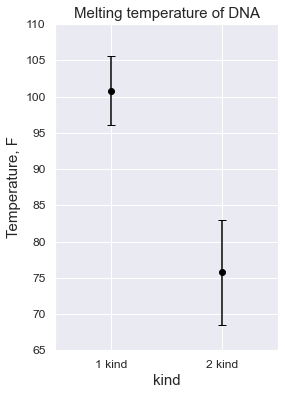

In [13]:
fig = plt.figure(figsize=(4, 6))
ax = fig.add_subplot(111)

plt.errorbar(x=df['kind'], y=df['Melting temperature of DNA'], yerr=df['interval'], color="black", capsize=4, fmt ='o')
plt.axis([-0.5, 1.5, 65, 110])
ax.set_xlabel('kind', fontsize=15)
ax.set_ylabel('Temperature, F', fontsize=15)
ax.set_title('Melting temperature of DNA', fontsize=15)
plt.show()

## [2.3 Проверка распределения на нормальность, QQ-Plot](https://stepik.org/lesson/8082/step/1?unit=1361)

### Сравнение распределения с нормальным
Требования нормальности данных часто всплывает в тех или иных критериях, в связи с чем требуются методы для оценки нормальности распределения.

### QQ-Plot
Можно применить графический тест, где просто построить теоретическое нормальное распределение поверх нашего

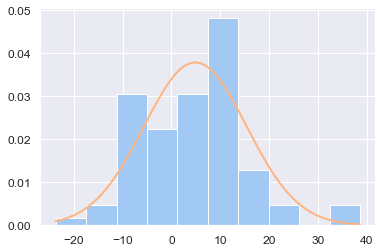

In [14]:
sample = np.random.normal(5, 10, size=100)

x_plot = np.linspace(np.min(sample), np.max(sample), num=100)
y_plot = stats.norm.pdf(x_plot, loc=sample.mean(), scale=sample.std())

sns.set_palette("pastel")
plt.hist(sample, density=True)
plt.plot(x_plot, y_plot, lw=2)

Другим способом является quantile-quantile plot или просто QQ-plot

Координаты на котором по оси x это это квантили нашего теоретического распределения

По оси y выборочного

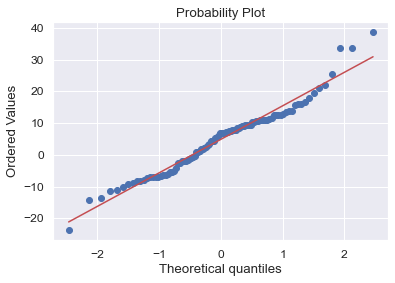

In [15]:
stats.probplot(sample, dist="norm", plot=plt)
plt.show()

Вернемся к задаче, которую рассматривали раннее

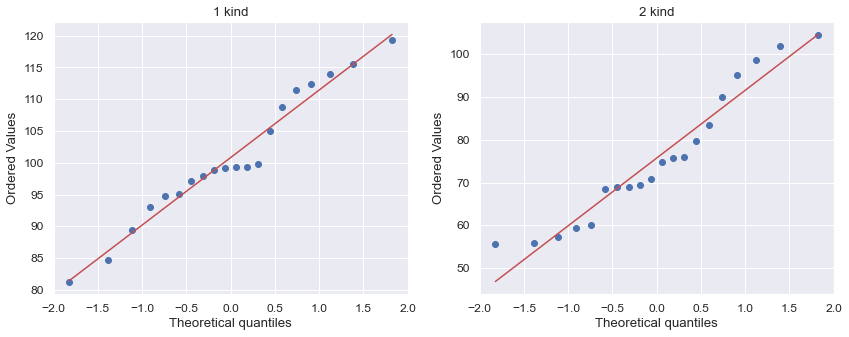

In [16]:
fig = plt.figure(figsize=(14, 5))
ax_1 = fig.add_subplot(121)
ax_2 = fig.add_subplot(122)
stats.probplot(sample_1, dist="norm", plot=ax_1)
ax_1.set_title('1 kind')
stats.probplot(sample_2, dist="norm", plot=ax_2)
ax_2.set_title('2 kind')
plt.subplots_adjust(wspace=0.2)
plt.show()

### Тест Шапиро-Вилка

Тест позволяющий выяснить нормальность распределения

In [17]:
stats.shapiro(sample_1)

stats.shapiro(sample_2)

ShapiroResult(statistic=0.9255580902099609, pvalue=0.12679679691791534)

### Проблема выбросов
Добавим всего по одному выбросу в наши выборки и посмотрим как это повлияет на статистически значимые различия, что мы получили до этого

In [18]:
sample_1_ = np.concatenate([sample_1, [np.min(sample_1)-80]])
sample_2_ = np.concatenate([sample_2, [np.max(sample_2)+80]])

In [19]:
x = np.array(['1 kind']*len(sample_1_) + ['2 kind']*len(sample_2_))
y = np.concatenate([sample_1_, sample_2_])
data = pd.DataFrame({'kind': x, 'Melting temperature of DNA': y})

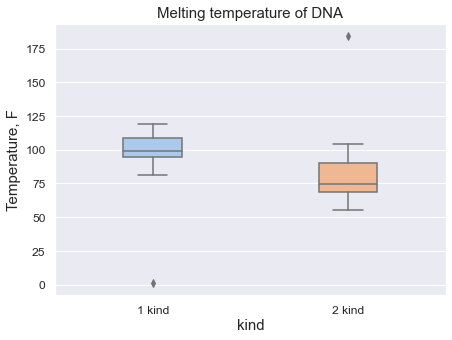

In [20]:
fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(111)
sns.set_palette("pastel")
sns.boxplot(x="kind", y="Melting temperature of DNA", data=data, width=0.3)
sns.set(font_scale=1.1)
sns.color_palette("hls", 8)
ax.set_xlabel('kind', fontsize=15)
ax.set_ylabel('Temperature, F', fontsize=15)
ax.set_title('Melting temperature of DNA', fontsize=15)
sns.set_style("darkgrid")
plt.show()

In [21]:
# средние значения
X_1 = sample_1_.mean() 
X_2 = sample_2_.mean()

# объемы выборок
n_1 = len(sample_1_)
n_2 = len(sample_2_)

# стандартные отклонения
sd_1 = sample_1_.std(ddof=1)
sd_2 = sample_2_.std(ddof=1)

t = (X_1 - X_2)/np.sqrt(sd_1*sd_1/n_1 + sd_2*sd_2/n_2)

# Число степеней свободы
df = n_1 + n_2 - 2
2*stats.t.cdf(-t, df)

0.06681743217876819

Видно, что всего один выброс привел к отсутствию статистически значимых результатов, что происходит в следствие того, что выборка перестает подчиняться нормальному распределению

### U-критерий Манна-Уитни

Непараметрический ранговый критерий, который использует информацию о вариационном ряде

In [22]:
stats.mannwhitneyu(sample_1_, sample_2_, alternative = 'greater')

MannwhitneyuResult(statistic=356.5, pvalue=0.00032615199233629853)

Как видно, выбросы не помешали

Но и чувствительность будет меньше, не почувствуем различий когда они будут, то есть ошибка второго рода

## [2.4 Однофакторный дисперсионный анализ](https://stepik.org/lesson/8083/step/1?unit=1362)

Очень часто в экспериментах и исследованиях возникает необходимость сравнить несколько групп между собой. В таком случае мы можем применять однофакторный дисперсионный анализ. Та переменная, которая будет разделять наших испытуемых или наблюдения на группы (номинативная переменная с нескольким градациями) называется независимой переменной. А та количественная переменная, по степени выраженности которой мы сравниваем группы, называется зависимая переменная. 

### Расчет на практическом примере
Хотим сравнить три группы между собой.
$$
H_0: M1=M2=M3
$$
$$
H_1: !(M1=M2=M3)
$$

In [23]:
sample_1 = np.array([3, 1, 2])
sample_2 = np.array([5, 3, 4])
sample_3 = np.array([7, 6, 5])

sample = np.concatenate([sample_1, sample_2, sample_3])

In [24]:
# среднее значение всех групп
sample_mean = sample.mean()
sample_mean

4.0

Определим SST (sum squared terms или общая сумма квадратов) --- сумма отклонений квадратов от среднего для всех элементов из всех групп, которая характеризует общую изменчивость наших данных

In [25]:
SST = sum((sample-sample_mean)**2)
SST

30.0

In [26]:
# число степеней свобод
df = len(sample) - 1

SST определяется двумя факторами: SSB (межгрупповая Sum Squared Between groups) и SSW (внутригрупповая Sum Squared Within groups)

Рассчитаем SSW 

In [27]:
# список с изменчивостью внутри группы
SSW = [sum((s - s.mean())**2) for s in [sample_1, sample_2, sample_3]]
SSW = sum(SSW)
SSW

6.0

Число степеней свободы для этого показателя дается как:
$$
df = N - m
$$
где N - общее число наблюдений, а m число групп

In [28]:
df_W = len(sample) - len([sample_1, sample_2, sample_3])
df_W

6

Теперь рассчитаем SSB

In [29]:
# список с изменчивостью между групп
SSB = [len(s)*(s.mean() - sample_mean)**2 for s in [sample_1, sample_2, sample_3]]
SSB = sum(SSB)
SSB

24.0

Число степеней свободы в данном случае это:
$$
df = m - 1
$$

In [30]:
df_B = len([sample_1, sample_2, sample_3]) - 1
df_B

2

Заметим, что в нашем случае общая изменчивость получается за счет изменчивость межгрупповой, что говорит о том, что данные скорее различаются между собой

### F-значение
Введем понятие F-значения как:
$$
F = \frac{\frac{SSB}{m-1}}{\frac{SSW}{N-m}} 
$$

In [31]:
F = SSB/df_B/(SSW/df_W)
F

12.0

При принятии нулевой гипотезы введеная нами величина F имела бы распределение Фишера, которое зависит от двух параметров:
число свобод для междугруповой изменчивости и внутригрупповой

Рассчитаем p-value, то есть вероятность получить такие же или более сильные различия при принятии нулевой гипотезы

In [32]:
df_B, df_W

(2, 6)

In [33]:
1 - stats.f.cdf(F, df_B, df_W)

0.008000000000000007

Готовое решение

In [34]:
stats.f_oneway(sample_1, sample_2, sample_3)

F_onewayResult(statistic=12.0, pvalue=0.008000000000000002)

`Задача`

Допустим, что при сравнении четырех групп между собой (по 5 наблюдений в каждой группе) вы получили F = 3.5, тогда:

In [35]:
1 - stats.f.cdf(3.5, 4-1, 20-4)

0.040052541494826066

**Ответ**: Отклоняем нулевую гипотезу о равенстве средних, т.к. $p < 0,05$

Немного об обозначениях в дисперсионном анализе.

Когда мы делим значение межгрупповой суммы квадратов на соответствующее число степеней свободы (число групп минус один), мы тем самым усредняем полученный показатель. Усредненное значение межгрупповой суммы квадратов называется межгрупповым средним квадратом  
$$
 MS_{bg}=\frac{SSB}{df_{bg}}\quad df_{bg}=m-1\quad
 $$

Отношение внутригрупповой суммы квадратов к соответствующему числу степеней свободы (число всех наблюдений минус число групп) — это внутригрупповой средний квадрат 
$$
MS_{wg}=\frac{SSW}{df_{wg}}\quad df_{wg} = N-m
$$

Поэтому формула F-значения (F-отношение) часто записывается:
$$
F=\frac{MS_{bg}}{MS_{wg}}
$$

`Задача`

Отметьте верное утверждение (утверждения):


**Ответ** Чем больше дисперсия внутри групп, тем больше значение внутригруппового квадрата (при неизменном количестве наблюдений)

Общая сумма квадратов, деленная на число всех наблюдений минус один — это и есть дисперсия, рассчитанная для всех наших наблюдений без учета деления на группы

### Применение и интерпретация

`Пример`
Генотерапия позволяет корректировать работу дефектного гена, ответственного за развитие заболевания. В эксперименте сравнивалась эффективность четырех различных типов терапии. Результаты исследования представлены в таблице

In [36]:
data = pd.read_csv('./datasets/genetherapy.csv')

In [37]:
df = pd.pivot_table(data, values='expr', index='Therapy', aggfunc=[len, np.mean, np.std])
df.columns = df.columns.get_level_values(0)
df = df.rename(columns={'len': 'N', 'mean': 'Mx', 'std': 'SD'})
df = df.reset_index()
df

,Therapy,N,Mx,SD
0,A,15,99.733333,4.165619
1,B,15,98.800000,5.894307
2,C,15,94.400000,5.193402
3,D,15,92.333333,3.735289


Получим выборки из данных

In [38]:
groups = []
for i in data.Therapy.unique():
    groups.append(np.asarray(data[data.Therapy==i].expr))

In [39]:
stats.f_oneway(*groups)

F_onewayResult(statistic=8.03730248114399, pvalue=0.00015249722895229536)

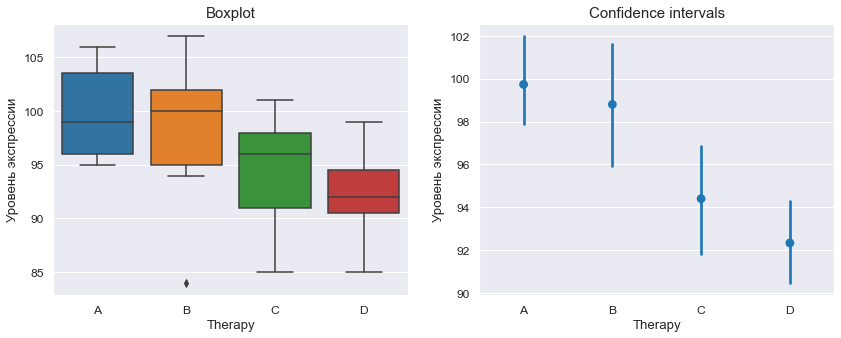

In [40]:
fig = plt.figure(figsize=(14, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
sns.set_palette("tab10")
sns.boxplot(x='Therapy', y='expr', data=data, ax=ax1)
sns.pointplot(x='Therapy', y='expr', data=data, join=False, ax=ax2)
ax1.set_title('Boxplot', fontsize=15)
ax1.set_ylabel('Уровень экспрессии')
ax2.set_ylabel('Уровень экспрессии')
ax2.set_title('Confidence intervals', fontsize=15)
plt.show()

## [2.5 Множественные сравнения в ANOVA](https://stepik.org/lesson/8085/step/1?unit=1364)

### Проблема множественного сравнения выборок
Почему нельзя просто попарно сравнивать выборки между собой

Проведем следующий эксперимент, будет 1000 генерировать две группы по 30 наблюдений в каждой из одной генеральной совокупности и проводить для них однофакторный дисперсионный анализ

In [41]:
result = np.zeros(1000, dtype=int)
for i in range(1000):
    sample_1 = np.random.normal(size=30)
    sample_2 = np.random.normal(size=30)
    if stats.f_oneway(sample_1, sample_2).pvalue < 0.05:
        result[i] = 1

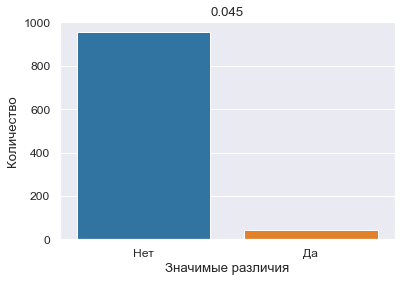

In [42]:
fig = plt.figure()
ax = fig.add_subplot(111)
sns.barplot(x=['Нет', 'Да'], y=np.bincount(result), ax=ax)
ax.set_xlabel('Значимые различия')
ax.set_ylabel('Количество')
ax.set_title(f'{np.bincount(result)[1]/1000}')
plt.show()

Увеличим теперь число выборок до 8

In [43]:
import itertools

result = np.zeros(1000, dtype=int)
for i in range(1000):
    groups = []
    for j in range(30):
        a = stats.norm.rvs(size=30)
        groups.append(a)
    for pair in itertools.combinations(groups, 2):
        if stats.f_oneway(*pair).pvalue < 0.05:
            result[i] = 1
            break
np.bincount(result)

array([ 15, 985], dtype=int64)

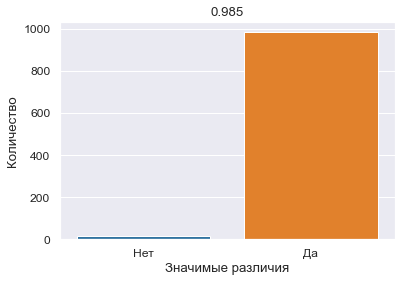

In [44]:
fig = plt.figure()
ax = fig.add_subplot(111)
sns.barplot(x=['Нет', 'Да'], y=np.bincount(result), ax=ax)
ax.set_xlabel('Значимые различия')
ax.set_ylabel('Количество')
ax.set_title(f'{np.bincount(result)[1]/1000}')
plt.show()

Приходим к проблеме, в которой при множественных попарных сравнениях мы часто находим различия, где их нет. Решить это можно, например, при помощи поправки Бонферрони

### Поправка Бонферрони
Идея очень простая, скорректировать уровень значимости в соответствии с количеством попарных сравнений.

In [45]:
result = np.zeros(1000, dtype=int)
for i in range(1000):
    groups = []
    for j in range(8):
        a = stats.norm.rvs(size=30)
        groups.append(a)
    for pair in itertools.combinations(groups, 2):
        if stats.f_oneway(*pair).pvalue < 0.05/(8*7/2):
            result[i] = 1
            break
np.bincount(result)

array([960,  40], dtype=int64)

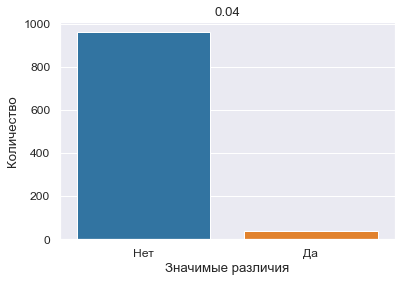

In [46]:
fig = plt.figure()
ax = fig.add_subplot(111)
sns.barplot(x=['Нет', 'Да'], y=np.bincount(result), ax=ax)
ax.set_xlabel('Значимые различия')
ax.set_ylabel('Количество')
ax.set_title(f'{np.bincount(result)[1]/1000}')
plt.show()

Как видим, при 8 группах это отлично работает

Теперь рассмотрим 20 групп

In [47]:
result = np.zeros(1000, dtype=int)
for i in range(1000):
    groups = []
    for j in range(20):
        a = stats.norm.rvs(size=30)
        groups.append(a)
    for pair in itertools.combinations(groups, 2):
        if stats.f_oneway(*pair).pvalue < 0.05/(20*19/2):
            result[i] = 1
            break
np.bincount(result)

array([970,  30], dtype=int64)

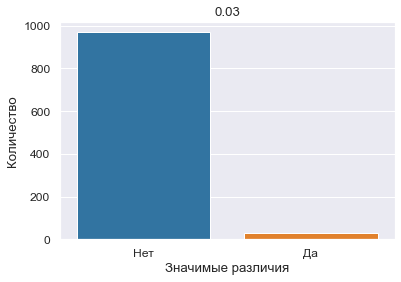

In [48]:
fig = plt.figure()
ax = fig.add_subplot(111)
sns.barplot(x=['Нет', 'Да'], y=np.bincount(result), ax=ax)
ax.set_xlabel('Значимые различия')
ax.set_ylabel('Количество')
ax.set_title(f'{np.bincount(result)[1]/1000}')
plt.show()

Тоже отлично работает

Поправка Бонферонни делает крайне затруднительным нахождение значимых различий, вследствие чего данная поправка подвергается критике

### Критерий Тьюки
Вычисление критерия Тьюки:
$$
\displaystyle q = \frac{\overline x_B - \overline x_A}{SE}
$$, при этом
$$
\displaystyle SE = \sqrt \frac{MS_w}{n}
$$
 где
 $\displaystyle MS_w$  - внутригрупповая дисперсия.

Приведённая формула верна для случаев, когда все сравниваемые группы содержат одинаковое число наблюдений n. Если же сравниваемые группы неодинаковы по размеру, то
$$
SE = \displaystyle\sqrt{\frac{MS_w}{2}\left (\frac{1}{n_A}+\frac{1}{n_B}\right )}
$$

Потом значимость оценивается по распределению Стьюдента

Для каждой пары групп независимо. Т.е. для групп i и j:
$$
{SE}_{ij} = \displaystyle\sqrt{\frac{MSW_{ij}}{2}\left (\frac{1}{n_i}+\frac{1}{n_j}\right )}
$$
 
Для расчёта доверительного интервала используется не T-распределение, а Studentized range distribution со степенями свободы 2 и $n_i + n_j - 2n $
Например, $95\%$ доверительный интервал:
$$
\overline x_i - \overline x_j ﻿\pm ﻿q_{0.05;2;n_i + n_j - 2}{SE}_{ij} 
$$
 

In [49]:
from statsmodels.stats.multicomp import (pairwise_tukeyhsd, MultiComparison)

In [50]:
data.head()

,expr,Therapy
0,100,A
1,96,A
2,101,A
3,95,A
4,103,A


In [51]:
multi_comp = MultiComparison(data.expr, data.Therapy)

multi_comp.tukeyhsd().summary()

group1,group2,meandiff,p-adj,lower,upper,reject
A,B,-0.9333,0.9,-5.5961,3.7294,False
A,C,-5.3333,0.0189,-9.9961,-0.6706,True
A,D,-7.4,0.001,-12.0628,-2.7372,True
B,C,-4.4,0.0712,-9.0628,0.2628,False
B,D,-6.4667,0.0029,-11.1294,-1.8039,True
C,D,-2.0667,0.6296,-6.7294,2.5961,False


### Интерпретация результатов

`Задание`
Чтобы выяснить, как лучше преподавать статистику, преподаватели разбили студентов на пять групп. В каждой группе использовалась различная методика преподавания. В конце года каждая группа написала итоговую работу. Таким образом, сравнивалось пять групп по среднему баллу контрольной работы. Был применен однофакторный дисперсионный анализ, по результатам которого удалось отклонить нулевую гипотезу о равенстве средних. 

Сколько сравнений необходимо произвести, чтобы попарно сравнить все группы между собой?

In [52]:
5*4/2

10.0

**Ответ**: 10

`Задание`
Необходимо ли применять поправку на множественное сравнение при сравнении этих групп (из предыдущего вопроса) между собой?

**Ответ**: Да, т.к. возрастает вероятность совершить ошибку первого рода.

`Задание`
Курение считают основным фактором, предрасполагающим к хроническим заболеваниям легких. Однако пассивное курение таким фактором обычно не считается. Группа исследователей усомнилась в безвредности пассивного курения и исследовали проходимость дыхательных путей у некурящих, пассивных и активных курильщиков. В качестве зависимой переменной выступал один из показателей функции внешнего дыхания — максимальная объемная скорость середины выдоха. Исследователям удалось отклонить основную нулевую гипотезу о равенстве средних при p<0,05.

Для попарного сравнения всех групп между собой использовалась поправка Бонферрони.  И различиям между группами признавались статистически достоверными, если p-уровень значимости 

np.round(0.05/(3*2/2), 3)

**Ответ**: меньше 0,017

## [2.6 Многофакторный ANOVA](https://stepik.org/lesson/9250/step/1?unit=1830)

### Двухфакторный дисперсионный анализ
До этого в качестве независимой переменной мы использовали только один фактор. Теперь будем использовать несколько.
Начнем с примера.
`Пример`
Атеросклероз довольно опасное заболевание - причина ишемической болезни сердца и инсультов. Анализ экспрессии генов лейкоцитов позволяет предсказать вероятность развития данного заболевания. В эксперименте исследовался уровень экспрессии в зависимости от <u>возраста пациентов</u> и <u>дозировки лекарства</u> аторвастатина

In [53]:
data = pd.read_csv('./datasets/atherosclerosis.csv')

In [54]:
data.head()

,expr,age,dose
0,107.351478,1,D1
1,104.504438,1,D1
2,103.435134,1,D1
3,109.572882,1,D1
4,114.993803,1,D1


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   expr    64 non-null     float64
 1   age     64 non-null     int64  
 2   dose    64 non-null     object 
dtypes: float64(1), int64(1), object(1)
memory usage: 1.6+ KB


In [56]:
pivot = pd.pivot_table(data, index=['age', 'dose'], values=['expr'], aggfunc=[len, np.mean, np.std])
pivot.columns = pivot.columns.get_level_values(0)
pivot = pivot.rename(columns={'len': 'N', 'mean': 'Mx', 'std': 'SD'})
pivot = pivot.reset_index()
pivot['Возраст'] = pd.Series(['молодые' if x==1 else 'пожилые' for x in pivot['age']])
pivot['Дозировка'] = pd.Series(['высокая' if x=='D1' else 'низкая' for x in pivot['dose']])
pivot.drop(['age', 'dose'], axis=1, inplace=True)
cols = pivot.columns.tolist()
cols = cols[-2:] +  cols[:-2]
pivot = pivot[cols]
pivot

,Возраст,Дозировка,N,Mx,SD
0,молодые,высокая,16.0,104.758464,5.863454
1,молодые,низкая,16.0,105.545864,4.369024
2,пожилые,высокая,16.0,101.004805,5.116310
3,пожилые,низкая,16.0,102.273629,5.135374


Теперь изменчивость складывается из следующих факторов:

$$
SST = SSW + SSB_{A} + SSB_{B} + SSB_{A}\odot SSB_{B}
$$

In [57]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [58]:
model = ols('expr ~ C(dose)*C(age)', data).fit()

sm.stats.anova_lm(model, typ="II")

,sum_sq,df,F,PR(>F)
C(dose),16.912241,1.0,0.638094,0.427552
C(age),197.452754,1.0,7.449841,0.008313
C(dose):C(age),0.927077,1.0,0.034978,0.852272
Residual,1590.257424,60.0,NaN,NaN


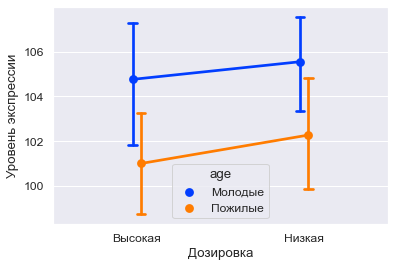

In [59]:
fig = plt.figure()
ax = fig.add_subplot(111)
sns.set_palette("bright")
plot = sns.pointplot(x='dose', y='expr', hue='age', data=data,
                     dodge=True, ax=ax, legend_out = True,
                    capsize=0.05)
new_labels = ['Молодые', 'Пожилые']
for t, l in zip(plot.legend_.texts, new_labels): 
    t.set_text(l)
ax.set_xticklabels(['Высокая', 'Низкая'])
ax.set_ylabel('Уровень экспрессии')
ax.set_xlabel('Дозировка')
plt.show()

`Задание`
Предположим, мы хотим выяснить, есть ли значимые различия в успешности прохождения онлайн-курса по введению в статистику (итоговый балл) у представителей разных факультетов (биологи, математики, психологи) с учетом курса обучения (1,3,5 курсы). В таком случае желательно чтобы:
**Ответ**: Итоговый балл — зависимая переменная, факультет и курс — независимые переменные

`Задание`
Предположим, мы хотим выяснить, есть ли значимые различия в успешности прохождения онлайн-курса по введению в статистику (итоговый балл) у представителей разных факультетов (биологи, математики, психологи) с учетом курса обучения (1,3,5 курсы). Для проверки нулевой гипотезы о равенстве среднего итогового балла во всех группах осмысленнее всего применять:
**Ответ**: Двуфакторный дисперсионный анализ

### Взаимодействие факторов в ANOVA
Рассмотрим не то, как влияют на итоговый результат отдельные переменные, а их взаимодействие. Для этого вновь рассмотрим пример

`Пример`

Исследователей интересовало влияние инъекции некоторого гормона на показатель концентрации кальция в плазме крови у птиц с учетом их пола. В таблице представлены данные экспериментальной и контрольной группы.

In [60]:
data = pd.read_csv('./datasets/birds.csv')

In [61]:
data.head()

,var4,hormone,sex
0,17.859039,1,1
1,20.842343,1,1
2,19.318099,1,1
3,20.064451,1,1
4,17.620316,1,1


In [62]:
pivot = pd.pivot_table(data, index=['hormone', 'sex'], values=['var4'], aggfunc=[len, np.mean, np.std])
pivot.columns = pivot.columns.get_level_values(0)
pivot = pivot.rename(columns={'len': 'N', 'mean': 'Mx', 'std': 'SD'})
pivot = pivot.reset_index()
pivot['Инъекция'] = pd.Series(['да' if x==1 else 'нет' for x in pivot['hormone']])
pivot['Пол'] = pd.Series(['мужской' if x==1 else 'женский' for x in pivot['sex']])
pivot.drop(['hormone', 'sex'], axis=1, inplace=True)
cols = pivot.columns.tolist()
cols = cols[-2:] +  cols[:-2]
pivot = pivot[cols]
pivot

,Инъекция,Пол,N,Mx,SD
0,нет,женский,16.0,19.887291,3.677211
1,нет,мужской,16.0,17.608916,2.449753
2,да,женский,16.0,17.292254,2.864428
3,да,мужской,16.0,19.743662,3.383574


Применим дисперсионный анализ

In [63]:
model = ols('var4 ~ C(hormone)*C(sex)', data).fit()
sm.stats.anova_lm(model, typ="II")

,sum_sq,df,F,PR(>F)
C(hormone),0.847472,1.0,0.086528,0.769653
C(sex),0.119762,1.0,0.012228,0.912318
C(hormone):C(sex),89.483384,1.0,9.136390,0.003682
Residual,587.650394,60.0,NaN,NaN


В результат получили, что факторы по отдельности не внесли сильный вклад в изменчивость, однако, вместе вносят довольно существенный вклад

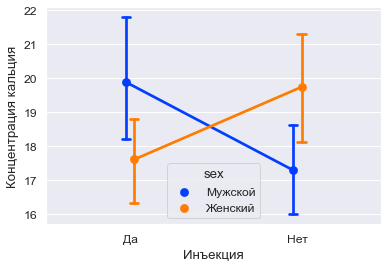

In [64]:
fig = plt.figure()
ax = fig.add_subplot(111)
sns.set_palette("bright")
plot = sns.pointplot(x='hormone', y='var4', hue='sex', data=data,
                     dodge=True, ax=ax, legend_out = True,
                    capsize=0.05)
new_labels = ['Мужской', 'Женский']
for t, l in zip(plot.legend_.texts, new_labels): 
    t.set_text(l)
ax.set_xticklabels(['Да', 'Нет'])
ax.set_ylabel('Концентрация кальция')
ax.set_xlabel('Инъекция')
plt.show()

График дает нам наглядную интерпретацию полученных данных, получается, что в зависимости от пола, инъекция оказала разное влияние на концентрацию кальция

`Задание`

![alt text](.\\images\\36.png "Title")

Компания, разрабатывающая мобильные телефоны, перед выпуском двух новых моделей (№1 и №2), решила выяснить, как потенциальные пользователи воспринимают эти новинки . Для этого компания набрала фокус-группу (100 мужчин, 100 женщин) и попросила участников оценить дизайн новых моделей телефонов от 1 до 100. Чтобы проанализировать полученные результаты, был применен двуфакторный дисперсионный анализ (зависимая переменная - оценка испытуемых по 100-балльной шкале, независимые переменные (факторы) - номер модели и пол испытуемых). 
Соотнесите графики результатов (  A, B, C, D) и различные результаты исследования. 

**Ответ**:

| График | Ответ |
| --- | --- |
| A |  значимый эффект только для фактора модели телефона |
| B |  значимый эффект только для фактора пола участников исследования |
| С |  значимый эффект для обоих факторов |
| D |  значимое взаимодействие факторов |

`Задание`

Взаимодействие факторов в дисперсионном анализе означает, что

**Ответ**: Влияние одного фактора по-разному проявляется на зависимую переменную в зависимости от градаций другого фактора

`Задание`

Причиной отклонения нулевой гипотезы в многофакторном дисперсионном анализе (о равенстве средних во всех группах) может стать:
**Ответ**:
Значимый эффект для всех факторов

Значимое взаимодействие факторов

Значимый эффект одного из фактора

<u>Каждый из предложенных вариантов</u>

`Задание`

Могут ли очень заметные выбросы негативно повлиять на результаты дисперсионного анализа?

**Ответ**: Да, так как могут нежелательно повлиять на значения средних межгрупповых и внутригрупповых квадратов (особенно в случае небольшого количества наблюдений).

`Задание`

Укажите верные высказывания относительно дисперсионного анализа:

**Ответ**:

При увеличении числа групп число степеней свободы для межгруппового среднего квадрата также увеличивается

Поправка Бонферрони применяется для коррекции p-уровня значимости при множественных сравнениях.

### Требования к данным

Дисперсионный анализ выдвигает два требования для данных:

1. Нормальность данных
1. Гомогенность дисперсий

Проверки на соответствие первому требованию были обсуждены ранее

Для второго требования можно применить тест Левина:

In [65]:
data = pd.read_csv('./datasets/genetherapy.csv')

In [66]:
groups = []
for i in data.Therapy.unique():
    groups.append(np.asarray(data[data.Therapy==i].expr))

In [67]:
stats.levene(*groups)

LeveneResult(statistic=0.6477908627745761, pvalue=0.5876330665111003)

`Задание`

Укажите, какие ограничения желательно проверять при использовании дисперсионного анализа:

**Ответ**: Нормальное распределение зависимой переменной в группах, гомогенность (однородность) дисперсий

### Интерпрертация результатов

Дисперсионный анализ ничего не говорит о причинно-следственных связях, поэтому важно помнить, что может иметь место обратное влияние